<a href="https://colab.research.google.com/github/heyrobin/Python/blob/main/Sentiment%20Analysis/Cardano_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tweepy
from textblob import TextBlob
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#importing keys to authenticate the access twitter API
#connect as OATH handler
consumer_key = "8AO6OU5ubyi4XO47b1C7Sjdlz"
consumer_sec = "FS1usPrfPolvjLXbwGka5N8TWkOZhUsdxGmmTwuO016koesUSt"

# from proxy server we need to connect
access_token = "1151573806680592384-OUFeUtpsRFZM6jQxl1AG99NEjlY0Kt"
access_token_sec = "KKHmkHkDGVaDof8XK4fKKI52DmNl4vZlaXnx85WRfd4Lr"


In [3]:
#explore tweepy
dir(tweepy)

['API',
 'AppAuthHandler',
 'Cache',
 'Cursor',
 'DirectMessage',
 'FileCache',
 'Friendship',
 'MemoryCache',
 'ModelFactory',
 'OAuthHandler',
 'RateLimitError',
 'SavedSearch',
 'SearchResults',
 'Status',
 'Stream',
 'StreamListener',
 'TweepError',
 'User',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'auth',
 'binder',
 'cache',
 'cursor',
 'debug',
 'error',
 'models',
 'parsers',
 'streaming',
 'utils']

In [4]:
#creating authentication object
authenticate = tweepy.OAuthHandler(consumer_key,consumer_sec)
#set the access token and the access token secret
authenticate.set_access_token(access_token,access_token_sec)
#create the API object
api = tweepy.API(authenticate)

In [5]:
#Gather 1000 tweets about cardano and filter out any retweets
search_term = '#cardano -filter:retweets'
#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-01-01',tweet_mode= 'extended').items(2000)
#store the tweets in variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(10)

,Tweets
0,My $ALPACA price is at $10 #UnderRated \n\n___...
1,1st of April! #DOGE is pumping! PUMP SEASON is...
2,#Cardano EPOCH 255 results for minting $ADA ht...
3,Cardano: Hoskinson outlines roadmap for infras...
4,Cardano: Hoskinson outlines roadmap for infras...
5,Today d = 0\nI am so proud of being #Cardano S...
6,All the #psychedelic research supporters🍄\nTha...
7,Looks like PoolPeek mobile is now available in...
8,Any potential delegators waiting on the sideli...
9,"Cardano, the most decentralized POS blockchain..."


In [7]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#cardano', 'cardano', twt)
  twt = re.sub('#Cardano', 'Cardano', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+','', twt) #removes any hyperlinks
  return twt


In [8]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#result
df.head(10)

,Tweets,Cleaned_Tweets
0,My $ALPACA price is at $10 #UnderRated \n\n___...,My $ALPACA price is at $10 ________@AlpacaFin...
1,1st of April! #DOGE is pumping! PUMP SEASON is...,1st of April! is pumping! PUMP SEASON is comi...
2,#Cardano EPOCH 255 results for minting $ADA ht...,Cardano EPOCH 255 results for minting $ADA
3,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...
4,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...
5,Today d = 0\nI am so proud of being #Cardano S...,Today d = 0I am so proud of being Cardano SPO ...
6,All the #psychedelic research supporters🍄\nTha...,All the research supporters🍄Thanks for joinin...
7,Looks like PoolPeek mobile is now available in...,Looks like PoolPeek mobile is now available in...
8,Any potential delegators waiting on the sideli...,Any potential delegators waiting on the sideli...
9,"Cardano, the most decentralized POS blockchain...","Cardano, the most decentralized POS blockchain..."


In [11]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called subjectivity and Polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#show
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,My $ALPACA price is at $10 #UnderRated \n\n___...,My $ALPACA price is at $10 ________@AlpacaFin...,0.000,0.000
1,1st of April! #DOGE is pumping! PUMP SEASON is...,1st of April! is pumping! PUMP SEASON is comi...,0.000,0.000
2,#Cardano EPOCH 255 results for minting $ADA ht...,Cardano EPOCH 255 results for minting $ADA,0.000,0.000
3,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...,0.000,0.000
4,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...,0.500,0.500
5,Today d = 0\nI am so proud of being #Cardano S...,Today d = 0I am so proud of being Cardano SPO ...,0.650,1.000
6,All the #psychedelic research supporters🍄\nTha...,All the research supporters🍄Thanks for joinin...,0.000,0.000
7,Looks like PoolPeek mobile is now available in...,Looks like PoolPeek mobile is now available in...,0.050,0.050
8,Any potential delegators waiting on the sideli...,Any potential delegators waiting on the sideli...,0.775,0.175
9,"Cardano, the most decentralized POS blockchain...","Cardano, the most decentralized POS blockchain...",0.500,0.500


In [19]:
#Create a function to get the sentiment text
def getSentiment(Score):
  if Score < 0:
    return 'Negative'
  elif Score == 0:
    return 'Neutral'
  else:
    return 'Positive'



In [21]:
# Create a column called Sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

#Show
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,My $ALPACA price is at $10 #UnderRated \n\n___...,My $ALPACA price is at $10 ________@AlpacaFin...,0.000,0.000,Neutral
1,1st of April! #DOGE is pumping! PUMP SEASON is...,1st of April! is pumping! PUMP SEASON is comi...,0.000,0.000,Neutral
2,#Cardano EPOCH 255 results for minting $ADA ht...,Cardano EPOCH 255 results for minting $ADA,0.000,0.000,Neutral
3,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...,0.000,0.000,Neutral
4,Cardano: Hoskinson outlines roadmap for infras...,Cardano: Hoskinson outlines roadmap for infras...,0.500,0.500,Positive
5,Today d = 0\nI am so proud of being #Cardano S...,Today d = 0I am so proud of being Cardano SPO ...,0.650,1.000,Positive
6,All the #psychedelic research supporters🍄\nTha...,All the research supporters🍄Thanks for joinin...,0.000,0.000,Neutral
7,Looks like PoolPeek mobile is now available in...,Looks like PoolPeek mobile is now available in...,0.050,0.050,Positive
8,Any potential delegators waiting on the sideli...,Any potential delegators waiting on the sideli...,0.775,0.175,Positive
9,"Cardano, the most decentralized POS blockchain...","Cardano, the most decentralized POS blockchain...",0.500,0.500,Positive


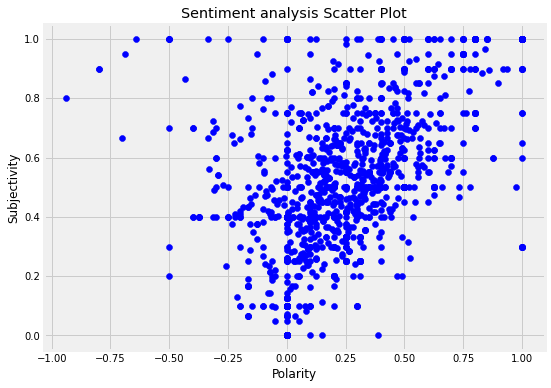

In [28]:
#create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color ='blue')
plt.title('Sentiment analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

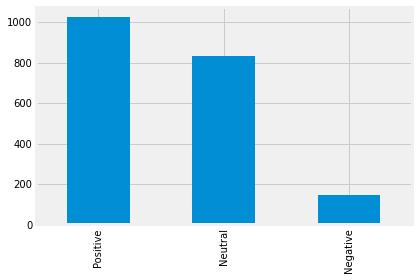

In [30]:
#Create a bar chart to show the count of positive, negative and neutral sentiment in the market
df['Sentiment'].value_counts().plot(kind='bar')